<a href="https://colab.research.google.com/github/shivanshu1303/Simple-ML-Algos-Implemented/blob/main/Naive%20Bayes%20Implemented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Here, I will implement the popular `Naive Bayes` machine learning algorithm. It is very similar to the Bayes theorem that everyone might know from having studied it in their probability classes.

### The Bayes theorem goes as:
### $P(A|B) = \frac {P(B|A)*P(A)}{P(B)}$
### where $P(A|B)$ means the probability of the event A happening given that event B has already happened.
### This is a very important treatise in 'Conditional Probability' i.e. situations where probability is calculated for an event given certain conditions are to be / have been met

### What this means in a machine learning case is:
### $P(y|X)=\frac{P(X|y)*P(y)}{P(X)}$, where
### $X$ is the feature vector: ${x_{0} ,x_{1},...,x_{n} }$ and
### $y$ is the target variable i.e. the output of the model/algorithm

![picture](https://media.licdn.com/dms/image/C4E12AQGpzSzHfmjGfQ/article-cover_image-shrink_423_752/0/1533388074059?e=1714608000&v=beta&t=c-7zl_8m7SuppNw_mEzrYcqjqtS1xucvGjgKexlPiLo)

We start as always by importing the necessary libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Next, we do the `fit` function

In [2]:
def fit(X,y):
  n_samples,n_features=X.shape
  classes=np.unique(y)  #.unique() always returns classes in an increasing order
  num_classes=len(classes)
  means=np.zeros((num_classes,n_features),dtype=np.float64)
  variances=np.zeros((num_classes,n_features),dtype=np.float64)
  priors=np.zeros(num_classes,dtype=np.float64)

  for idx,cls in enumerate(classes):
    X_cls=X[y==cls]

    means[idx,:]=X_cls.mean(axis=0)
    variances[idx,:]=X_cls.var(axis=0)
    priors[idx]=X_cls.shape[0]/float(n_samples)

  return means,variances,priors,classes

Now, we move on to coding the `predict` function

In [3]:
def predict(X,means,variances,priors,classes):
  predictions=[predict_one(x,means,variances,priors,classes) for x in X]  # x is one row in the entire table/dataframe X
  return np.array(predictions)

In [4]:
def predict_one(x,means,variances,priors,classes):
  posteriors=[]

  for idx,cls in enumerate(classes):
    prior=np.log(priors[idx])
    posterior=np.sum(np.log(pdf(idx,x,means,variances)))
    posterior+=prior
    posteriors.append(posterior)

  return classes[np.argmax(posteriors)]

Now, we define the `pdf` i.e. thje probability density function that we use to model/ evaluate the conditional probabilities for individual features

In [5]:
def pdf(idx,x,means,variances):
  numerator=np.exp(-((x-means[idx])**2)/(2*variances[idx]))
  denominator=np.sqrt(2*np.pi*variances[idx])
  return numerator/denominator

The final function we code is the accuracy function to tell us how well our model is performing

In [6]:
def accuracy(y_true,y_pred):
  return ( (np.sum(y_true==y_pred)) / len(y_true) )

## Now, we only have to feed out model data, train it and then test it

First, we create our data

In [9]:
np.random.seed(123)  # For reproducibility

# Generate synthetic data for training
n_samples_train = 800  # 80% for training
n_samples_test = 200   # 20% for testing
n_features = 2

# Training features and labels
X_train = np.random.randn(n_samples_train, n_features)
y_train = np.random.randint(0, 2, n_samples_train)

# Testing features and labels
X_test = np.random.randn(n_samples_test, n_features)
y_test = np.random.randint(0, 2, n_samples_test)

Then, we use it on our model

In [11]:
means, variances, priors, classes = fit(X_train, y_train)
predictions = predict(X_test, means, variances, priors, classes)
print(f"Naive Bayes classification accuracy: {accuracy(y_test, predictions)}")

Naive Bayes classification accuracy: 0.51


## As we see, the classifier performs quite badly with an accuracy of `0.51`, which means that when for 2 classes, a random guess would have an accuracy of 0.5, our model is only as good as a random guess.

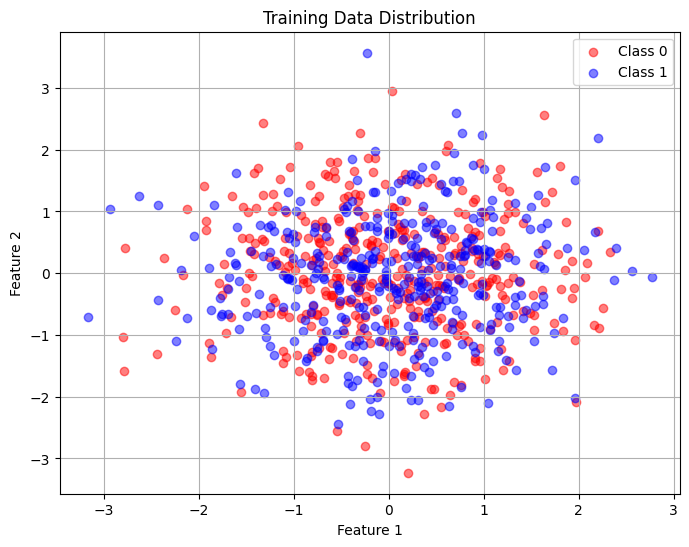

In [13]:
# Plot the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1', alpha=0.5)

# Plot settings
plt.title('Training Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## As we see in the above data, the points of both the classes are interspersed with each other. Even for a human, distinguishing the points would be incredibly difficult, let alone for an algorithm. Hence, we get such a horrible accuracy.

However, if we now use different dataset, we will observe a better performance from our model

In [14]:
np.random.seed(123)  # For reproducibility

# Parameters for the dataset, making it more separable
n_samples_per_class = 100
n_features = 2

# Generate class 0 (e.g., centered around (0,0))
X0 = np.random.randn(n_samples_per_class, n_features) * 0.5 - 2  # Tighter spread, shifted to left
y0 = np.zeros((n_samples_per_class,), dtype=int)

# Generate class 1 (e.g., centered around (2,2))
X1 = np.random.randn(n_samples_per_class, n_features) * 0.5 + 2  # Tighter spread, shifted to right
y1 = np.ones((n_samples_per_class,), dtype=int)

# Combine the data for training
X_train = np.vstack((X0, X1))
y_train = np.concatenate((y0, y1))

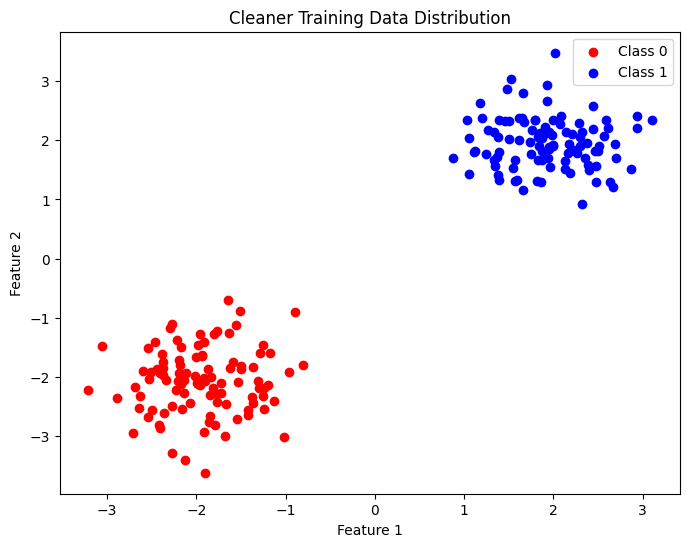

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 1')
plt.title('Cleaner Training Data Distribution')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Clearly, the above dataset is very separable and a classifier should be able to perform very well

In [16]:
X0_test = np.random.randn(n_samples_per_class, n_features) * 0.5 - 2  # Similar to training, shifted to left
y0_test = np.zeros((n_samples_per_class,), dtype=int)

X1_test = np.random.randn(n_samples_per_class, n_features) * 0.5 + 2  # Similar to training, shifted to right
y1_test = np.ones((n_samples_per_class,), dtype=int)

# Combine the data for testing
X_test = np.vstack((X0_test, X1_test))
y_test = np.concatenate((y0_test, y1_test))

# Fit the model with the cleaner training data
means_clean, variances_clean, priors_clean, classes_clean = fit(X_train, y_train)

# Make predictions with the cleaner test data
predictions_clean = predict(X_test, means_clean, variances_clean, priors_clean, classes_clean)

# Calculate accuracy with the cleaner dataset
accuracy_result_clean = accuracy(y_test, predictions_clean)
accuracy_result_clean

1.0

## As we see, due to the very differentiated nature of the dataset, the model learns quite well and we get a 100% accuracy.